##### EHD дескриптор описує наявність в певним місцях зображення країв, тобто контурів деяких об'єктів.

##### Зображення поділяється на блоки, сторони яких кратні 2 (у разі якщо при заданій кількості блоків неможливо поділити зображення так, щоб всі блоки мали довжини сторін кратними 2, крайні пікселі відкидаються від розгляду https://www.dcc.fc.up.pt/~mcoimbra/lectures/VC_1415/VC_1415_P8_LEH.pdf). 
##### Для кожного блоку визначається його тип. Робиться це шляхом поділу блока на 4 рівні частини, знаходження середньої яскравості кожної частини блоку та застосування фільтру певного типу до отриманих результатів. У разі якщо максимальне значення серед результатів застосувань фільтрів кожного з типів до блоку перевищує заданий поріг, вважається, що даний даний блок має тип того фільтра, після застосування якого досягається максимум. 

In [1]:
import numpy as np
import cv2
from math import sqrt
from matplotlib import pyplot as plt
from pandas import *
pandas.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
"""
На вхід EHD() подається чорно-біле зображення, кількість блоків та порогове значення
На виході отримуємо матрицю, кожний елемент якої має значення, що відповідає типу контура:
-1 - не є контуром (максимальне значення по фільтрам менше порогового)
0 - вертикальний
1 - горизонтальний
2 - діагональний 45 градусів
3 - діагональний 135 градусів
4 - неорієнтований контур
""" 

def process_block(block, threshold):
    ver_edge_filter = np.array([[1, -1], [1, -1]])
    hor_edge_filter = np.array([[1, 1], [-1, -1]])
    deg45_edge_filter = np.array([[sqrt(2), 0], [0, -sqrt(2)]])
    deg135_edge_filter = np.array([[0, sqrt(2)], [-sqrt(2), 0]])
    nond_edge_filter = np.array([[2, -2], [-2, 2]])
    filters = [ver_edge_filter, hor_edge_filter, deg45_edge_filter, 
               deg135_edge_filter, nond_edge_filter]
    
    block_size = block.shape[0]
    a = np.mean(block[0:block_size // 2, 0:block_size // 2])
    b = np.mean(block[0:block_size // 2, block_size // 2:])
    c = np.mean(block[block_size // 2:, 0:block_size // 2])
    d = np.mean(block[block_size // 2:, block_size // 2:])
    A = np.array([[a, b], [c, d]])
    res = []
    for filter_ in filters:
        temp = A * filter_
        val = abs(np.sum(temp))
        res.append(val)
    if np.max(res) <= threshold:
        return -1
    return np.argmax(res)
    
    

def EHD(img, block_num, threshold):
    
    x = sqrt(img.shape[0] * img.shape[1] / block_num)
    block_size = int((x // 2) * 2)
    
    result = [[-1 for j in range(0, img.shape[1] // block_size)] \
              for i in range(0, img.shape[0] // block_size)]
    i = 0
    while i + block_size <= img.shape[0]:
        j = 0
        while j + block_size <= img.shape[1]:
            block = img[i:i+block_size, j:j+block_size]
            block_type = process_block(block, threshold)
            result[i // block_size][j // block_size] = block_type
            j += block_size
        i += block_size
    return result
    

## Розглянемо деякі приклади

### Приклад 1
#### Трикутник

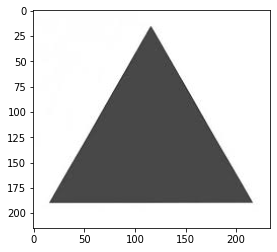

In [3]:
triangle = cv2.imread('triangle.jpeg',0)
plt.imshow(triangle, cmap='gray', vmin=0, vmax=255)

In [4]:
print(DataFrame(EHD(triangle, 200, 11)))

    0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15
0  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -1  -1  -1  -1  -1  -1
1  -1 -1 -1 -1 -1 -1 -1  4  3 -1  -1  -1  -1  -1  -1  -1
2  -1 -1 -1 -1 -1 -1 -1  0  4  4  -1  -1  -1  -1  -1  -1
3  -1 -1 -1 -1 -1 -1  4  4 -1  3  -1  -1  -1  -1  -1  -1
4  -1 -1 -1 -1 -1 -1  2 -1 -1 -1   3  -1  -1  -1  -1  -1
5  -1 -1 -1 -1 -1  4 -1 -1 -1 -1   4   4  -1  -1  -1  -1
6  -1 -1 -1 -1  4  4 -1 -1 -1 -1  -1   3  -1  -1  -1  -1
7  -1 -1 -1 -1  2 -1 -1 -1 -1 -1  -1   4   4  -1  -1  -1
8  -1 -1 -1  4  4 -1 -1 -1 -1 -1  -1  -1   3  -1  -1  -1
9  -1 -1 -1  0 -1 -1 -1 -1 -1 -1  -1  -1   4   4  -1  -1
10 -1 -1  4  4 -1 -1 -1 -1 -1 -1  -1  -1  -1   3  -1  -1
11 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  -1  -1  -1  -1   3  -1
12 -1  4 -1 -1 -1 -1 -1 -1 -1 -1  -1  -1  -1  -1   4   4
13 -1  3  1  1  1  1  1  1  1  1   1   1   1   1   1   4
14 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -1  -1  -1  -1  -1  -1


### Приклад 2
#### Прямокутний трикутник

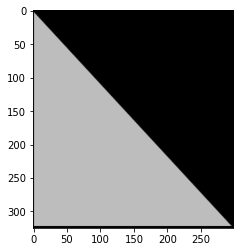

In [5]:
sqTriangle = cv2.imread('sqTriangle.png',0)
plt.imshow(sqTriangle, cmap='gray', vmin=0, vmax=255)

In [6]:
print(DataFrame(EHD(sqTriangle, 300, 11)))

    0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17
0   3 -1 -1 -1 -1 -1 -1 -1 -1 -1  -1  -1  -1  -1  -1  -1  -1  -1
1   0  3 -1 -1 -1 -1 -1 -1 -1 -1  -1  -1  -1  -1  -1  -1  -1  -1
2   0  4  4 -1 -1 -1 -1 -1 -1 -1  -1  -1  -1  -1  -1  -1  -1  -1
3   0 -1  4  4 -1 -1 -1 -1 -1 -1  -1  -1  -1  -1  -1  -1  -1  -1
4   0 -1 -1  4  4 -1 -1 -1 -1 -1  -1  -1  -1  -1  -1  -1  -1  -1
5   0 -1 -1 -1  4  4 -1 -1 -1 -1  -1  -1  -1  -1  -1  -1  -1  -1
6   0 -1 -1 -1 -1  4  4 -1 -1 -1  -1  -1  -1  -1  -1  -1  -1  -1
7   0 -1 -1 -1 -1 -1  4  4 -1 -1  -1  -1  -1  -1  -1  -1  -1  -1
8   0 -1 -1 -1 -1 -1 -1  4  4 -1  -1  -1  -1  -1  -1  -1  -1  -1
9   0 -1 -1 -1 -1 -1 -1 -1  3  4  -1  -1  -1  -1  -1  -1  -1  -1
10  0 -1 -1 -1 -1 -1 -1 -1 -1  3  -1  -1  -1  -1  -1  -1  -1  -1
11  0 -1 -1 -1 -1 -1 -1 -1 -1 -1   3  -1  -1  -1  -1  -1  -1  -1
12  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  -1   3  -1  -1  -1  -1  -1  -1
13  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  -1  -1   3  -1  -1  -1  -1  -1
14  0 -1 -1 -1 -1 -1 -1 -

### Приклад 3
#### Складне зображення

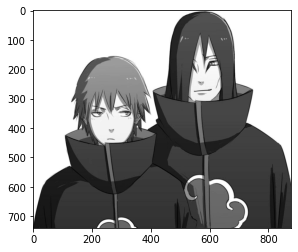

In [7]:
img = cv2.imread('OS.jpg',0)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [8]:
print(DataFrame(EHD(img, 300, 11)))

    0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18
0  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1   4   1   1   3   4  -1  -1  -1  -1
1  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1   0   4  -1  -1   0  -1  -1  -1  -1
2  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1   0   4   3   4   0  -1  -1  -1  -1
3  -1 -1 -1 -1  1  1  1  4 -1 -1   4   4   0   0   0  -1  -1  -1  -1
4  -1 -1 -1  2  2 -1 -1  3  4 -1   3   4   4   3   3  -1  -1  -1  -1
5  -1 -1 -1  0 -1 -1 -1  1  3  2   0   0   4   0   2   1   4  -1  -1
6  -1 -1  4  4  0  4  3  1  0  4   1   0   1   2   4  -1   0  -1  -1
7  -1 -1 -1  0  2  4  3  0  0  4  -1  -1   0  -1  -1   4   4  -1  -1
8  -1 -1 -1  0  0  4 -1  0  4  4   4  -1   0  -1  -1   4   3  -1  -1
9  -1 -1  0  1  4  1  1  1  1 -1   4   1   1   1   4   4  -1   3   4
10 -1 -1  0  4 -1  0 -1 -1  2 -1   2   1   2   2  -1  -1  -1  -1   0
11 -1  4  2  3 -1  0 -1 -1  4  4   4  -1   0  -1  -1  -1  -1   4   0
12  4  4 -1  1  4  3  1  4 -1 -1   3   0   2   1   4  -1  -1   0   4
13  0 -1  2 -1  4  1  1 -1 -1 -1  

## Висновки

### Як видно з перших двох прикладів, алгоритм не завжди відрізняє 45 і 135 градусні контури від неорієнтованих. У той час як вертикальні та горизонтальні розрізяються досить добре. На складному зображенні (якщо дуже вдивитися) алгоритм показав себе досить непогано та відтворив основні його контури. Серед недоліків слід зазначити наявність таких евристичних параметрів як кількість блоків (а отже і розмір) та порогове значення, які необхідно підбирати під вимоги кожної конкретної задачі .